# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('https://raw.githubusercontent.com/muriloavila/datascience/muriloavila-exercicio-modulo-5-1/SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.shape

(27028, 69)

In [4]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
#QTDPARTNOR (partos normais)  ,  #QTDPARTCES (partos cesários)

In [6]:
sinasc_raw.munResLat.describe()

count    27027.000000
mean       -10.377988
std          1.372942
min        -13.499760
25%        -11.433870
50%        -10.435950
75%         -8.768890
max         -8.768890
Name: munResLat, dtype: float64

In [7]:
categ_munResLat = pd.cut(sinasc_raw['munResLat'],[-13.5,-10.5,-8.5])

In [8]:
sinasc_1 = sinasc_raw[['munResLat','QTDPARTNOR','QTDPARTCES']].copy()

In [9]:
sinasc_1.groupby(categ_munResLat)[['QTDPARTNOR','QTDPARTCES']].agg({
    'QTDPARTNOR':[('soma','sum'),('média','mean'),('mínimo','min'),('máximo','max'),('mediana','median'),('desvio padrão','std'),('variância','var')],
    'QTDPARTCES':[('soma','sum'),('média','mean'),('mínimo','min'),('máximo','max'),('mediana','median'),('desvio padrão','std'),('variância','var')]
})

QTDPARTNOR                                                \
                     soma     média mínimo máximo mediana desvio padrão   
munResLat                                                                 
(-13.5, -10.5]     5800.0  0.452242    0.0   41.0     0.0      1.123426   
(-10.5, -8.5]      8771.0  0.711759    0.0   40.0     0.0      1.279042   

                         QTDPARTCES                                  \
               variância       soma     média mínimo máximo mediana   
munResLat                                                             
(-13.5, -10.5]  1.262087     7095.0  0.552570    0.0   12.0     0.0   
(-10.5, -8.5]   1.635949     6041.0  0.487335    0.0   12.0     0.0   

                                        
               desvio padrão variância  
munResLat                               
(-13.5, -10.5]      0.753036  0.567062  
(-10.5, -8.5]       0.737899  0.544495

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [10]:
sinasc_2 = sinasc_raw[['munResArea','IDADEMAE','IDADEPAI']].copy()
sinasc_2.head()

,munResArea,IDADEMAE,IDADEPAI
0,7067.025,19,26.0
1,7067.025,29,24.0
2,7067.025,37,32.0
3,3958.273,30,24.0
4,7067.025,30,27.0


In [11]:
sinasc_2.munResArea.describe()

count    27027.000000
mean     14702.799767
std      13706.177751
min        459.978000
25%       3792.998000
50%       6896.648000
75%      34096.394000
max      34096.394000
Name: munResArea, dtype: float64

In [12]:
categ_munResArea = pd.cut(sinasc_2.munResArea,[459,3000,34100] )
categ_munResArea.head()

0    (3000, 34100]
1    (3000, 34100]
2    (3000, 34100]
3    (3000, 34100]
4    (3000, 34100]
Name: munResArea, dtype: category
Categories (2, interval[int64, right]): [(459, 3000] < (3000, 34100]]

In [13]:
sinasc_2.groupby(categ_munResArea)[['IDADEMAE','IDADEPAI']].agg({
    'IDADEMAE':[('soma','sum'),('média','mean'),('mínimo','min'),('máximo','max'),('mediana','median'),('desvio padrão','std'),('variância','var')],
    'IDADEPAI':[('soma','sum'),('média','mean'),('mínimo','min'),('máximo','max'),('mediana','median'),('desvio padrão','std'),('variância','var')]
})

IDADEMAE                                                 \
                  soma      média mínimo máximo mediana desvio padrão   
munResArea                                                              
(459, 3000]     137389  26.324775     11     53    26.0      6.305535   
(3000, 34100]   567848  26.038518     12     53    25.0      6.405497   

                          IDADEPAI                                   \
               variância      soma      média mínimo máximo mediana   
munResArea                                                            
(459, 3000]    39.759775   78074.0  31.092792   16.0   69.0    30.0   
(3000, 34100]  41.030387  158424.0  31.094014   15.0   86.0    30.0   

                                        
              desvio padrão  variância  
munResArea                              
(459, 3000]        7.675474  58.912900  
(3000, 34100]      7.818364  61.126809

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [14]:
sinasc_3 = sinasc_raw[['munResAlt','APGAR1','APGAR5']]
sinasc_3.head()

,munResAlt,APGAR1,APGAR5
0,338.0,9.0,10.0
1,338.0,8.0,9.0
2,338.0,8.0,10.0
3,397.0,9.0,10.0
4,338.0,8.0,10.0


In [15]:
sinasc_3.munResAlt.describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

In [16]:
categ_munResAlt = pd.cut(sinasc_3.munResAlt,[84.5,87,153,191,596])
categ_munResAlt

0        (191.0, 596.0]
1        (191.0, 596.0]
2        (191.0, 596.0]
3        (191.0, 596.0]
4        (191.0, 596.0]
              ...      
27023    (191.0, 596.0]
27024    (191.0, 596.0]
27025    (191.0, 596.0]
27026    (191.0, 596.0]
27027    (191.0, 596.0]
Name: munResAlt, Length: 27028, dtype: category
Categories (4, interval[float64, right]): [(84.5, 87.0] < (87.0, 153.0] < (153.0, 191.0] < (191.0, 596.0]]

In [17]:
sinasc_3.groupby(categ_munResAlt).count()

,munResAlt,APGAR1,APGAR5
munResAlt,,,
"(84.5, 87.0]",8774,8717,8717
"(87.0, 153.0]",4848,4828,4825
"(153.0, 191.0]",6938,6936,6934
"(191.0, 596.0]",6467,6450,6448


In [18]:
sinasc_3.groupby(categ_munResAlt)[['APGAR1','APGAR5']].agg({
    'APGAR1':[('soma','sum'),('média','mean'),('mínimo','min'),('máximo','max'),('mediana','median'),('desvio padrão','std'),('variância','var')],
    'APGAR5':[('soma','sum'),('média','mean'),('mínimo','min'),('máximo','max'),('mediana','median'),('desvio padrão','std'),('variância','var')]
})

APGAR1                                                \
                   soma     média mínimo máximo mediana desvio padrão   
munResAlt                                                               
(84.5, 87.0]    72098.0  8.270965    0.0   10.0     8.0      0.936486   
(87.0, 153.0]   39053.0  8.088857    0.0   10.0     8.0      1.127916   
(153.0, 191.0]  55562.0  8.010669    0.0   10.0     8.0      0.935960   
(191.0, 596.0]  52436.0  8.129612    0.0   10.0     8.0      0.963406   

                           APGAR5                                  \
               variância     soma     média mínimo máximo mediana   
munResAlt                                                           
(84.5, 87.0]    0.877006  80321.0  9.214294    0.0   10.0     9.0   
(87.0, 153.0]   1.272194  44646.0  9.253057    0.0   10.0     9.0   
(153.0, 191.0]  0.876022  63330.0  9.133256    0.0   10.0     9.0   
(191.0, 596.0]  0.928151  58842.0  9.125620    0.0   10.0     9.0   

                                        
               desvio padrão variância  
munResAlt                               
(84.5, 87.0]        0.761006  0.579130  
(87.0, 153.0]       0.824080  0.679108  
(153.0, 191.0]      0.785972  0.617751  
(191.0, 596.0]      0.802339  0.643749

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [19]:
sinasc_4 = sinasc_raw[['IDADEMAE','CODMUNNASC','DTNASC']].copy()
sinasc_4.head()

,IDADEMAE,CODMUNNASC,DTNASC
0,19,110001,2019-02-19
1,29,110001,2019-02-21
2,37,110001,2019-02-25
3,30,110001,2019-03-20
4,30,110001,2019-03-23


In [20]:
sinasc_4.dtypes

IDADEMAE       int64
CODMUNNASC     int64
DTNASC        object
dtype: object

In [21]:
sinasc_4 = sinasc_4[(sinasc_4['CODMUNNASC']>=110001)&(sinasc_4['CODMUNNASC']<=110006)]

In [22]:
sinasc_4 = sinasc_4.reset_index()
sinasc_4.head()

,index,IDADEMAE,CODMUNNASC,DTNASC
0,0,19,110001,2019-02-19
1,1,29,110001,2019-02-21
2,2,37,110001,2019-02-25
3,3,30,110001,2019-03-20
4,4,30,110001,2019-03-23


In [23]:
sinasc_4.drop('index',axis=1,inplace=True)

In [24]:
meses = []
for i in sinasc_4.index:
    mes = sinasc_4.DTNASC[i].split('-')[1]
    meses.append(mes)
sinasc_4['MES'] = meses

In [25]:
sinasc_4.head()

,IDADEMAE,CODMUNNASC,DTNASC,MES
0,19,110001,2019-02-19,02
1,29,110001,2019-02-21,02
2,37,110001,2019-02-25,02
3,30,110001,2019-03-20,03
4,30,110001,2019-03-23,03


In [26]:
sinasc_4 = sinasc_4.groupby(['MES','CODMUNNASC']).mean()

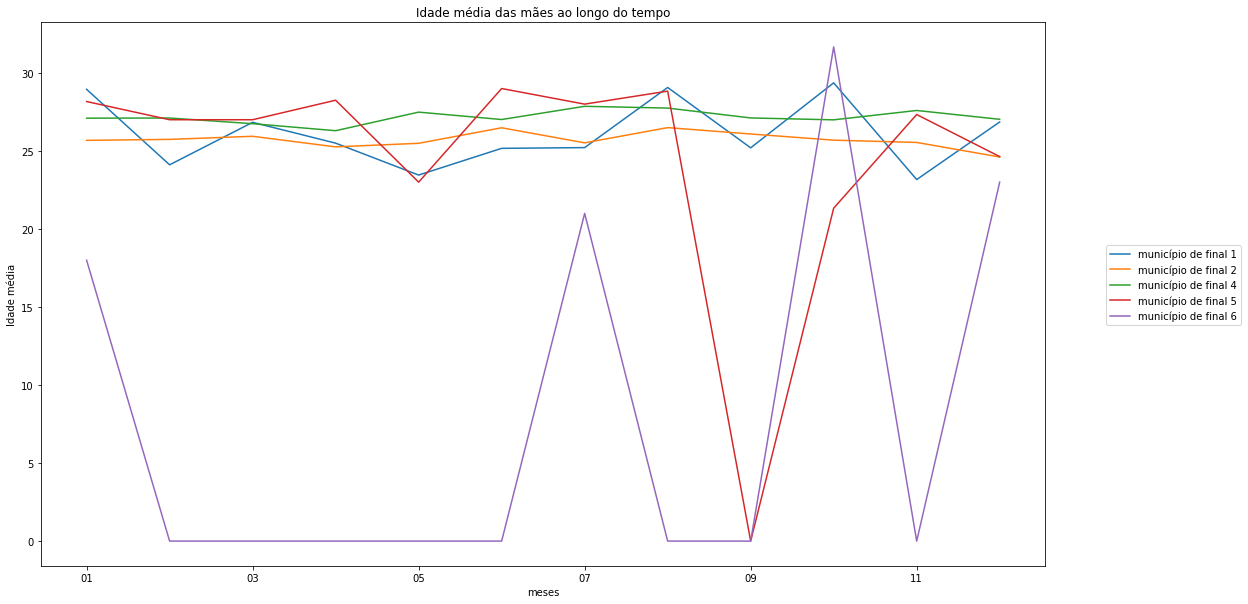

In [27]:
sinasc_4.unstack().fillna(0).plot(figsize=[18,10])
#plt.xticks(labels=list(range(0,12))
ticks,labels = plt.xticks()
plt.xlabel('meses')
plt.title('Idade média das mães ao longo do tempo')
plt.ylabel('Idade média')
plt.plot()
plt.legend(['município de final 1','município de final 2','município de final 4','município de final 5','município de final 6'],
          bbox_to_anchor = (1.2,0.6))


### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [28]:
sinasc_raw

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


In [29]:
sinasc_5 = sinasc_raw[['munResNome','munResUf']] .copy()
sinasc_5.head()

,munResNome,munResUf
0,Alta Floresta D'Oeste,Rondônia
1,Alta Floresta D'Oeste,Rondônia
2,Alta Floresta D'Oeste,Rondônia
3,Alto Alegre dos Parecis,Rondônia
4,Alta Floresta D'Oeste,Rondônia


In [30]:
sinasc_5 = sinasc_5.set_index('munResNome')

In [46]:
mapping_1 = {
    "Porto Velho":'IDH-ALTO',
    "Vilhena":'IDH-ALTO',
    "Cacoal":'IDH-ALTO',
    "Ji-Paraná":'IDH-ALTO',
    "Pimenta Bueno":'IDH-ALTO',
    "Ariquemes":'IDH-ALTO',
    "Rolim de Moura":'IDH-ALTO',
    'Cerejeiras':'IDH-MEDIO',
    'Jaru':'IDH-MEDIO',
    'Colorado do Oeste':'IDH-MEDIO',
    'Ouro Preto do Oeste':'IDH-MEDIO',
    "Espigão d'Oeste":'IDH-MEDIO',
    "Santa Luzia d'Oeste":'IDH-MEDIO',
    "Pimenteiras do Oeste":'IDH-MEDIO',
    "Presidente Médici":'IDH-MEDIO',
    "Castanheiras":'IDH-MEDIO',
    "Guajará-Mirim":'IDH-MEDIO',
    "Chupinguaia":'IDH-MEDIO',
    "Cabixi":'IDH-MEDIO',
    "Candeias do Jamari":'IDH-MEDIO',
    "São Felipe d'Oeste":'IDH-MEDIO',
    "Cacaulândia":'IDH-MEDIO',
    "São Miguel do Guaporé":'IDH-MEDIO',
    "Mirante da Serra":'IDH-MEDIO',
    "Alvorada d'Oeste":'IDH-MEDIO',
    "Teixeirópolis":'IDH-MEDIO',
    "Nova Brasilândia d'Oeste":'IDH-MEDIO',
    "Rio Crespo":'IDH-MEDIO',
    "Primavera de Rondônia":'IDH-MEDIO',
    "Alta Floresta d'Oeste":'IDH-MEDIO',
    "Ministro Andreazza":'IDH-MEDIO',
    "Novo Horizonte do Oeste":'IDH-MEDIO',
    "Vale do Paraíso":'IDH-MEDIO',
    "Alto Paraíso":'IDH-MEDIO',
    "Parecis":'IDH-MEDIO',
    "Buritis":'IDH-MEDIO',
    "Itapuã do Oeste":'IDH-MEDIO',
    "Corumbiara":'IDH-MEDIO',
    "Cujubim":'IDH-MEDIO',
    'Costa Marques':'IDH-MEDIO',
    "São Francisco do Guaporé":'IDH-MEDIO',
    "Urupá":'IDH-MEDIO',
    "Monte Negro":'IDH-MEDIO',
    "Seringueiras":'IDH-baixo',
    "Governador Jorge Teixeira":'IDH-baixo',
    "Machadinho d'Oeste":'IDH-baixo',
    "Campo Novo de Rondônia":'IDH-baixo',
    "Alto Alegre dos Parecis":'IDH-baixo',
    "Theobroma":'IDH-baixo',
    "Nova União":'IDH-baixo',
    "Nova Mamoré":'IDH-baixo',
    "Vale do Anari":'IDH-baixo'
    
}

In [47]:
sinasc_5.groupby(mapping_1).count()

,munResUf
munResNome,
IDH-ALTO,16855
IDH-MEDIO,6910
IDH-baixo,1326


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [48]:
mapping_2= {
    'Ariquemes':'IFDM-moderado',
    "Vilhena":'IFDM-moderado',
    "Pimenta Bueno":'IFDM-moderado',
    "Porto Velho":'IFDM-moderado',
    "Ji-Paraná":'IFDM-moderado',
    "Cacoal":'IFDM-moderado',
    "Santa Luzia d'Oeste":'IFDM-moderado',
    "Rolim de Moura":'IFDM-moderado',
    "Chupinguaia":'IFDM-moderado',
    "São Miguel do Guaporé":'IFDM-moderado',
    "Pimenteiras do Oeste":'IFDM-moderado',
    "Teixeirópolis":'IFDM-moderado',
    "Colorado do Oeste":'IFDM-moderado',
    "Jaru":'IFDM-moderado',
    "Rio Crespo":'IFDM-moderado',
    "Primavera de Rondônia":'IFDM-moderado',
    "Alta Floresta d'Oeste":'IFDM-moderado',
    "Ouro Preto do Oeste":'IFDM-moderado',
    "São Francisco do Guaporé":'IFDM-moderado',
    "Candeias do Jamari":'IFDM-moderado',
    "Buritis":'IFDM-moderado',
    "São Felipe d'Oeste":'IFDM-moderado',
    "Presidente Médici":'IFDM-moderado',
    "Cerejeiras":'IFDM-moderado',
    "Monte Negro":'IFDM-moderado',
    "Urupá":'IFDM-moderado',
    
    "Espigão d'Oeste":'IFDM-regular',
    "Seringueiras":'IFDM-regular',
    "Alvorada d'Oeste":'IFDM-regular',
    "Itapuã do Oeste":'IFDM-regular',
    "Cabixi":'IFDM-regular',
    "Novo Horizonte do Oeste" :'IFDM-regular',
    "Nova Brasilândia d'Oeste":'IFDM-regular',
    "Vale do Paraíso":'IFDM-regular',
    "Corumbiara":'IFDM-regular',
    "Alto Paraíso":'IFDM-regular',
    "Cacaulândia":'IFDM-regular',
    "Vale do Anari":'IFDM-regular',
    "Ministro Andreazza":'IFDM-regular',
    "Costa Marques":'IFDM-regular',
    "Nova União":'IFDM-regular',
    "Guajará-Mirim":'IFDM-regular',
    "Mirante da Serra":'IFDM-regular',
    "Parecis":'IFDM-regular',
    "Castanheiras":'IFDM-regular',
    "Theobroma":'IFDM-regular',
    "Machadinho d'Oeste":'IFDM-regular',
    "Campo Novo de Rondônia":'IFDM-regular',
    "Nova Mamoré":'IFDM-regular',
    "Cujubim":'IFDM-regular',
    "Alto Alegre dos Parecis" :'IFDM-regular',
    "Governador Jorge Teixeira":'IFDM-regular'
        
}

In [49]:
sinasc_5.groupby(mapping_2).count()

,munResUf
munResNome,
IFDM-moderado,21426
IFDM-regular,3665


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [50]:
mapping_3= {
    "Porto Velho":'PIB - +1bilhão',
    "Ji-Paraná":'PIB - +1bilhão',
    "Vilhena":'PIB - +1bilhão',
    "Ariquemes":'PIB - +1bilhão',
    "Cacoal":'PIB - +1bilhão',
    "Jaru":'PIB - +1bilhão',
    "Rolim de Moura":'PIB - +1bilhão',
    "Pimenta Bueno":'PIB - +1bilhão',
    
    "Guajará-Mirim":'PIB - +500milhões',
    "Ouro Preto do Oeste":'PIB - +500milhões',
    "Buritis":'PIB - +500milhões',
    "Machadinho do Oeste":'PIB - +500milhões',
    "Espigão d'Oeste":'PIB - +500milhões',
    "São Miguel do Guaporé":'PIB - +500milhões',
    "Candeias do Jamari":'PIB - +500milhões',
    "Nova Mamoré":'PIB - +500milhões',
    "Cerejeiras":'PIB - +500milhões',
    
    "Alta Floresta do Oeste":'PIB - +300milhões',
    "Presidente Médici":'PIB - +300milhões',
    "Cujubim":'PIB - +300milhões',
    "Nova Brasilândia do Oeste":'PIB - +300milhões',
    "Alto Paraíso":'PIB - +300milhões',
    "São Francisco do Guaporé":'PIB - +300milhões',
    "Colorado do Oeste":'PIB - +300milhões',
    
    "Monte Negro":'PIB - +200milhões',
    "Alto Alegre dos Parecis":'PIB - +200milhões',
    "Campo Novo de Rondônia":'PIB - +200milhões',
    "Alvorada do Oeste":'PIB - +200milhões',
    
    "Chupinguaia":'PIB - +100milhões',
    "Corumbiara":'PIB - +100milhões',
    "Ministro Andreazza":'PIB - +100milhões',
    "Urupá":'PIB - +100milhões',
    "Costa Marques":'PIB - +100milhões',
    "Seringueiras":'PIB - +100milhões',
    "Mirante da Serra":'PIB - +100milhões',
    "Governador Jorge Teixeira":'PIB - +100milhões',
    "Theobroma":'PIB - +100milhões',
    "Santa Luzia do Oeste":'PIB - +100milhões',
    "Novo Horizonte do Oeste":'PIB - +100milhões',
    "Itapuã do Oeste":'PIB - +100milhões',
    "Vale do Paraíso":'PIB - +100milhões',
    "Cacaulândia":'PIB - +100milhões',
    "Cabixi":'PIB - +100milhões',
    "Vale do Anari":'PIB - +100milhões',
    
    "Nova União":'PIB - até 100milhões',
    "Parecis":'PIB - até 100milhões',
    "Rio Crespo":'PIB - até 100milhões',
    "Pimenteiras do Oeste":'PIB - até 100milhões',
    "Teixeirópolis":'PIB - até 100milhões',
    "São Felipe do Oeste":'PIB - até 100milhões',
    "Castanheiras":'PIB - até 100milhões',
    "Primavera de Rondônia":'PIB - até 100milhões'
    
}

In [51]:
sinasc_5.groupby(mapping_3).count()

,munResUf
munResNome,
PIB - +100milhões,1853
PIB - +1bilhão,17736
PIB - +200milhões,519
PIB - +300milhões,1252
PIB - +500milhões,3354
PIB - até 100milhões,377


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.